In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns
import os
import json
import sys
#388_21yrOld

In [60]:
if len(sys.argv) < 2:
    print("Error: Subject ID not provided.")
    sys.exit(1)  # Exit if subject ID is not provided

# Get the subject ID from command-line arguments
subject_id = sys.argv[1]

In [2]:
subject_id = input("Please enter the subject ID: ")
path=f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject_id}_gy-sulc_Output/' #Fix this line 

Please enter the subject ID:  MIMS_HC_036


In [3]:
lh_gyri_volume=nib.load(f'{path}lh_gyri-reg-nearest.nii')
lh_gyri=lh_gyri_volume.get_fdata()
lh_sulci_volume=nib.load(f'{path}lh_sulci-reg-nearest.nii')
lh_sulci=lh_sulci_volume.get_fdata()

rh_gyri_volume=nib.load(f'{path}rh_gyri-reg-nearest.nii')
rh_gyri=rh_gyri_volume.get_fdata()
rh_sulci_volume=nib.load(f'{path}rh_sulci-reg-nearest.nii')
rh_sulci=rh_sulci_volume.get_fdata()

In [4]:
mu_volume=nib.load(f'{path}Mu.nii')
mu_with_csf=mu_volume.get_fdata()

In [6]:
csf_volume=nib.load(f'{path}register_nu_csf.nii')
csf=csf_volume.get_fdata()
csf_mask=(csf < .5).astype(int)
nu_volume=nib.load(f'{path}nu_reg.nii')
#nu_volume=nib.load(f'{path}register_nu.nii')
t1=nu_volume.get_fdata()

In [7]:
mu = mu_with_csf*csf_mask

In [8]:
mu_lh_gyri = mu*lh_gyri
mu_lh_sulci = mu*lh_sulci

mu_rh_gyri = mu*rh_gyri
mu_rh_sulci = mu*rh_sulci

In [9]:
mu_lh_gyri_flat = mu_lh_gyri.flatten()
mu_lh_gyri_flat[mu_lh_gyri_flat == 0] = np.nan

mu_lh_sulci_flat = mu_lh_sulci.flatten()
mu_lh_sulci_flat[mu_lh_sulci_flat == 0] = np.nan

mu_rh_gyri_flat = mu_rh_gyri.flatten()
mu_rh_gyri_flat[mu_rh_gyri_flat == 0] = np.nan

mu_rh_sulci_flat = mu_rh_sulci.flatten()
mu_rh_sulci_flat[mu_rh_sulci_flat == 0] = np.nan

all_gyri = np.concatenate([mu_lh_gyri_flat, mu_rh_gyri_flat],axis=0)
all_sulci = np.concatenate([mu_lh_sulci_flat, mu_rh_sulci_flat],axis=0)

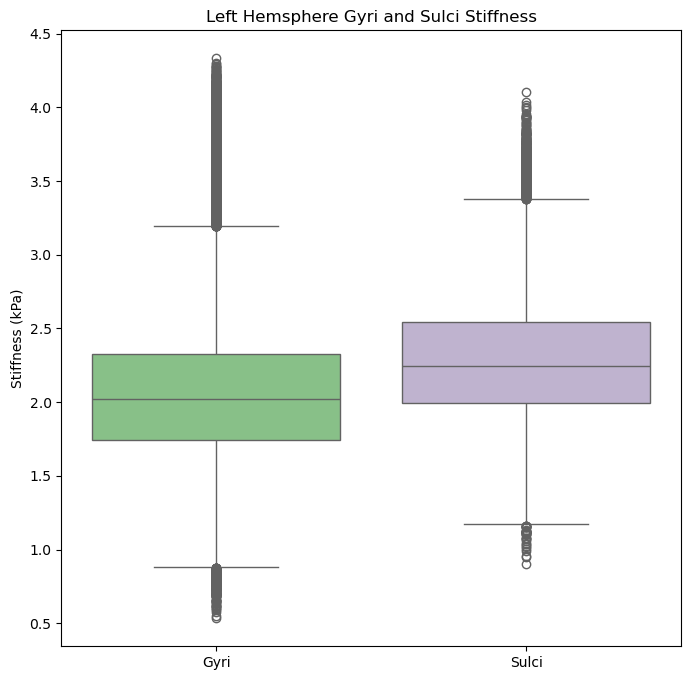

In [11]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=[all_gyri/1000, all_sulci/1000], palette='Accent')
plt.xticks([0, 1], ['Gyri', 'Sulci'])
plt.ylabel('Stiffness (kPa)')

plt.title('Left Hemsphere Gyri and Sulci Stiffness')
plt.ylabel('Stiffness (kPa)')
image_path = os.path.join(path, 'FinalOutputs/Box_Plot.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')



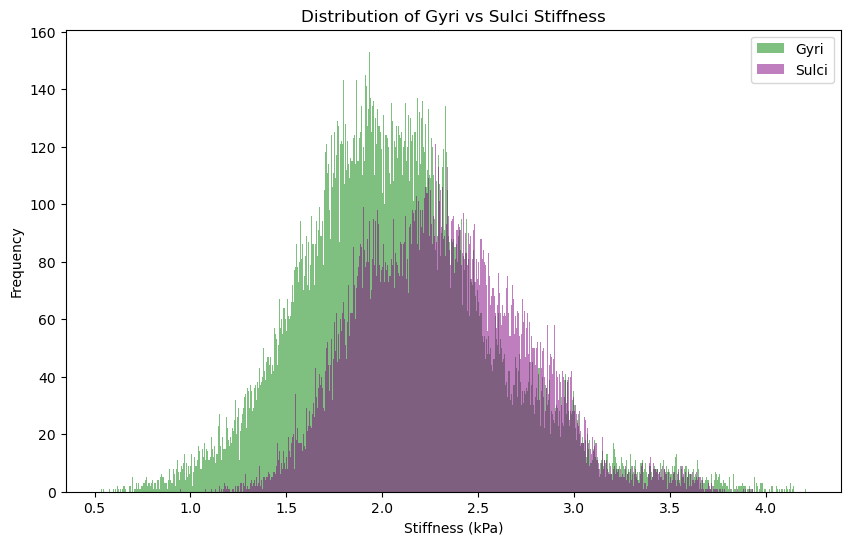

In [12]:
plt.figure(figsize=(10, 6))

plt.hist(mu_lh_gyri_flat/ 1000, bins=1000, alpha=0.5, label='Gyri', color='Green')
plt.hist(mu_lh_sulci_flat/ 1000, bins=1000, alpha=0.5, label='Sulci', color='Purple')

plt.legend(loc='best')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')


image_path = os.path.join(path, 'FinalOutputs/Histogram.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

In [13]:
mean_gyri = np.nanmean(mu_lh_gyri_flat)

mean_sulci = np.nanmean(mu_lh_sulci_flat)

percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100

abs_diff = abs(mean_gyri - mean_sulci)

In [15]:
mean_gyri/mean_sulci

0.9018423087831104

In [49]:
output_data = {
    "subject id ": "388_21yrOld",
    "Whole Brain Gyri Stiffness": mean_gyri,
    "Whole Brain Sulci Stiffness": mean_sulci,
    "Whole Brain Percent Difference": percent_diff
}

In [50]:
#lh_caudalmiddlefrontal
lh_cmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-caudalmiddlefrontal-reg-nearest.nii')
lh_cmf=lh_cmf_volume.get_fdata()
#lh_frontalpole
lh_fp_volume=nib.load(f'{path}/frontalROI/ctx-lh-frontalpole-reg-nearest.nii')
lh_fp=lh_fp_volume.get_fdata()
#lh_parsorbitalis
lh_po_volume=nib.load(f'{path}/frontalROI/ctx-lh-parsorbitalis-reg-nearest.nii')
lh_po=lh_po_volume.get_fdata()
#lh_precentral
lh_pc_volume=nib.load(f'{path}/frontalROI/ctx-lh-precentral-reg-nearest.nii')
lh_pc=lh_pc_volume.get_fdata()
#lh_rostralmiddlefrontal
lh_rmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-rostralmiddlefrontal-reg-nearest.nii')
lh_rmf=lh_rmf_volume.get_fdata()
#lh-superiorfronta
lh_sf_volume=nib.load(f'{path}/frontalROI/ctx-lh-superiorfrontal-reg-nearest.nii')
lh_sf=lh_sf_volume.get_fdata()

#rh_caudalmiddlefrontal
rh_cmf_volume=nib.load(f'{path}/frontalROI/ctx-rh-caudalmiddlefrontal-reg-nearest.nii')
rh_cmf=rh_cmf_volume.get_fdata()
#rh_frontalpole
rh_fp_volume=nib.load(f'{path}/frontalROI/ctx-rh-frontalpole-reg-nearest.nii')
rh_fp=rh_fp_volume.get_fdata()
#rh_parsorbitalis
rh_po_volume=nib.load(f'{path}/frontalROI/ctx-rh-parsorbitalis-reg-nearest.nii')
rh_po=rh_po_volume.get_fdata()
#rh_precentral
rh_pc_volume=nib.load(f'{path}/frontalROI/ctx-rh-precentral-reg-nearest.nii')
rh_pc=rh_pc_volume.get_fdata()
#rh_rostralmiddlefrontal
rh_rmf_volume=nib.load(f'{path}/frontalROI/ctx-rh-rostralmiddlefrontal-reg-nearest.nii')
rh_rmf=rh_rmf_volume.get_fdata()
#rh-superiorfronta
rh_sf_volume=nib.load(f'{path}/frontalROI/ctx-rh-superiorfrontal-reg-nearest.nii')
rh_sf=rh_sf_volume.get_fdata()

In [51]:
def roi_dict(roi_name, roi_data, mu_gyri, mu_sulci):
    roi_gyri_mu = {}
    roi_sulci_mu = {}

    for i in range(len(roi_data)):
        temp = roi_name[i]   
        roi_gyri_mu[temp] = mu_gyri * roi_data[i]
        roi_sulci_mu[temp] = mu_sulci * roi_data[i]

    return roi_gyri_mu, roi_sulci_mu

In [52]:
frontal_roi_name=['Caudal Middle Frontal', 'Precentral', 'Rostral Middle Frontal', 'Superior Frontal']

lh_frontal_roi_data=[lh_cmf,lh_pc,lh_rmf,lh_sf]

rh_frontal_roi_data=[rh_cmf,rh_pc,rh_rmf,rh_sf]

roi_lh_gyri_mu,roi_lh_sulci_mu = roi_dict(frontal_roi_name, lh_frontal_roi_data, mu_lh_gyri, mu_lh_sulci)
roi_rh_gyri_mu,roi_rh_sulci_mu = roi_dict(frontal_roi_name, rh_frontal_roi_data, mu_rh_gyri, mu_rh_sulci)

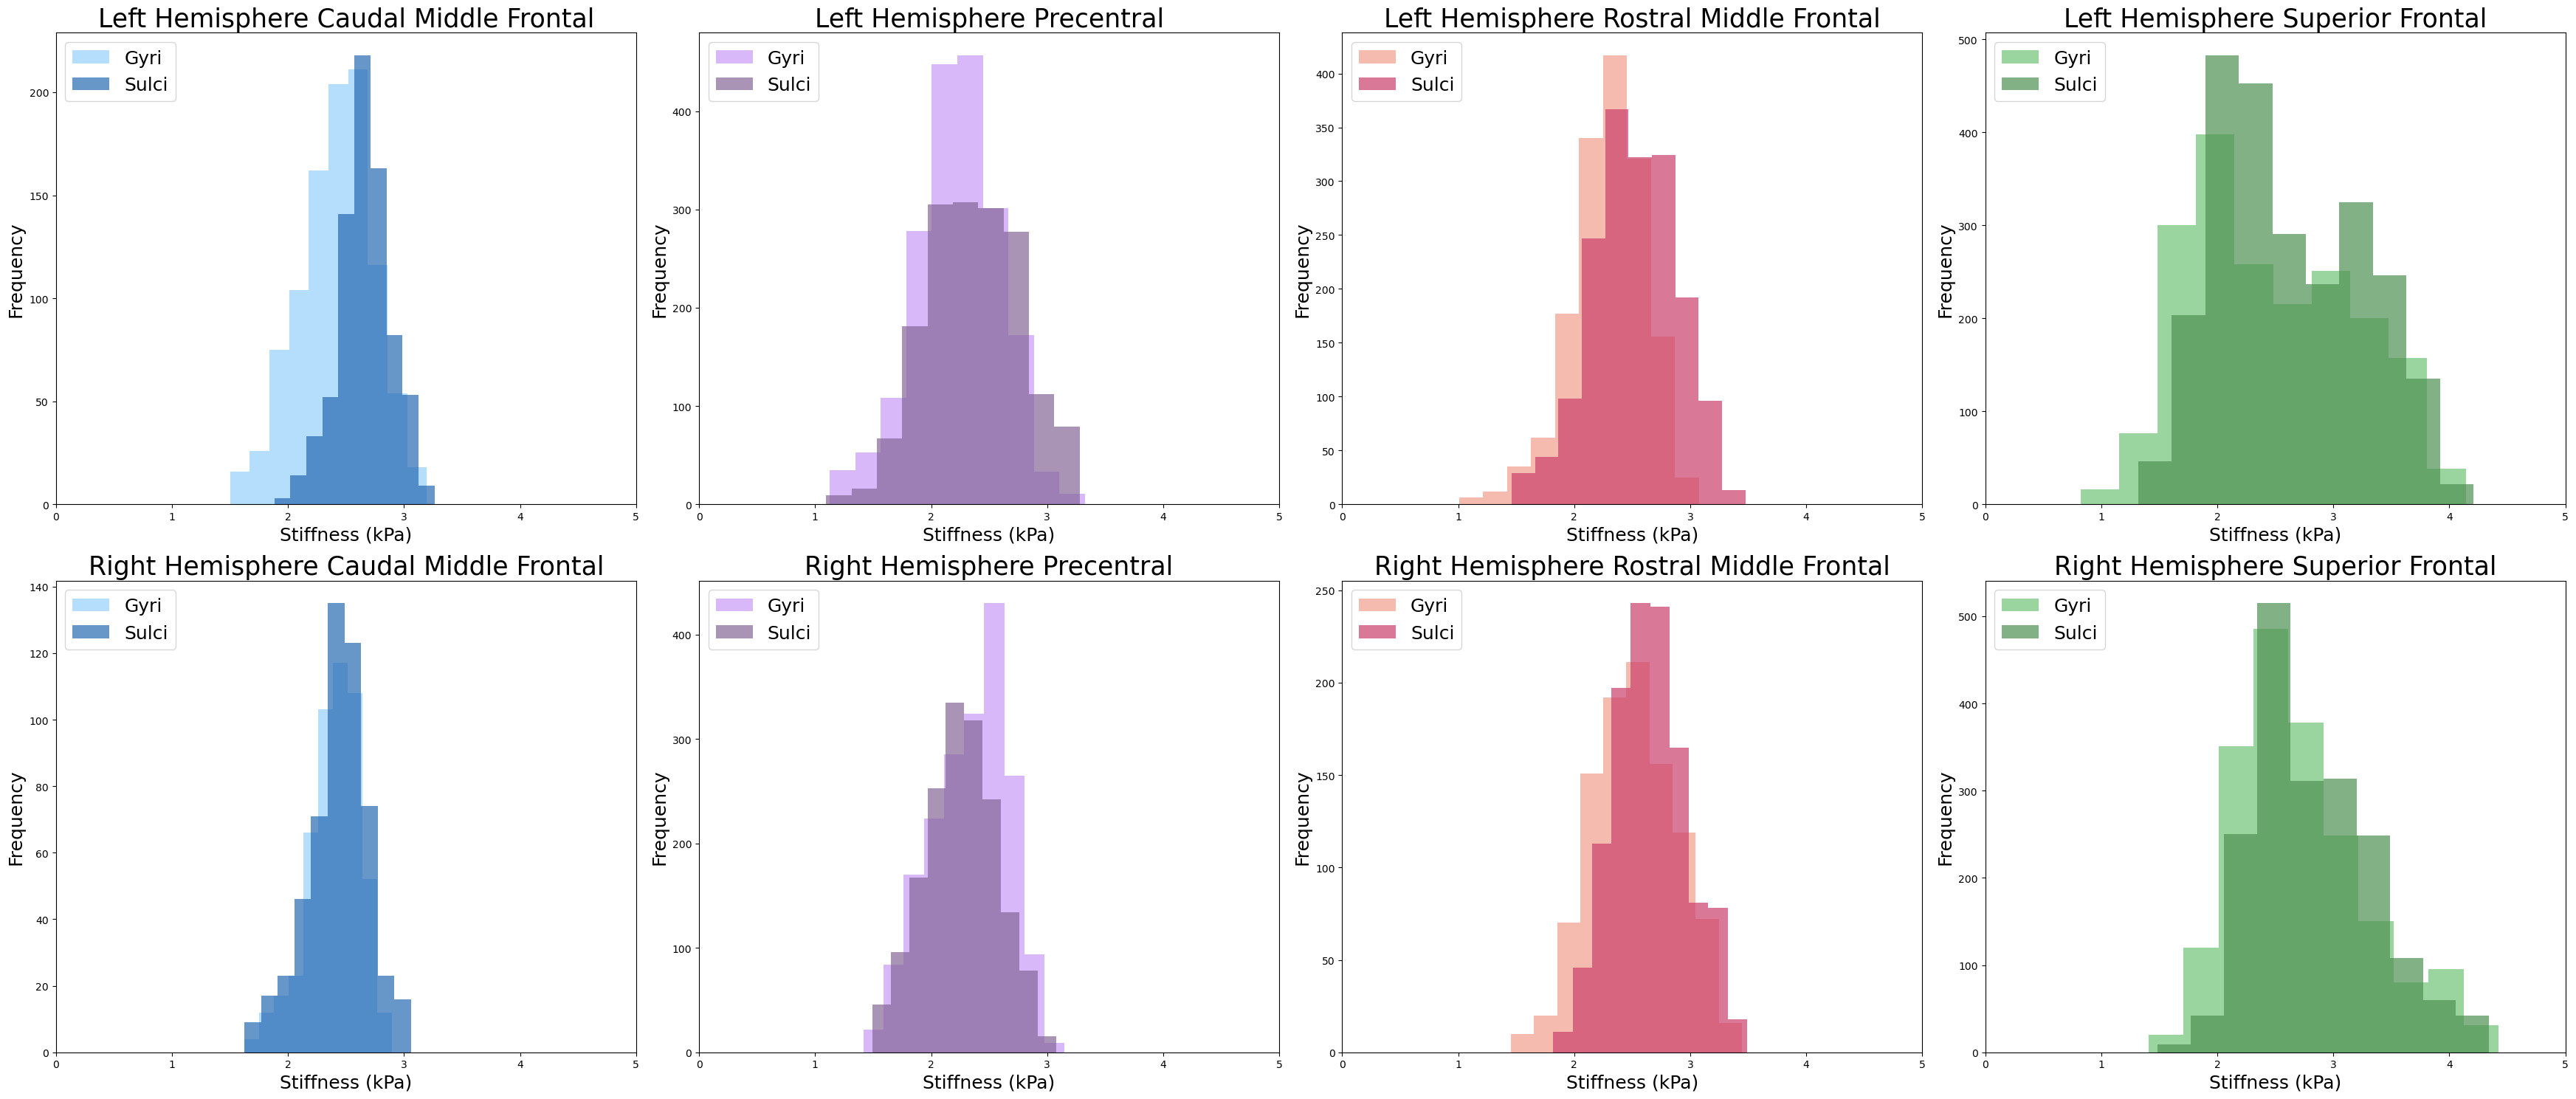

In [53]:
rows = 2
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35, 15))

axes = axes.flatten()

gyri_counts = []
sulci_counts = []

names = ['Caudal Middle Frontal', 'Precentral', 'Rostral Middle Frontal', 'Superior Frontal']

sulci_color = ['xkcd:mid blue','xkcd:dark lavender','xkcd:dark pink','xkcd:light forest green']
gyri_color = ['xkcd:light blue','xkcd:baby purple','xkcd:blush','xkcd:soft green']

# First plot the histograms for the left hemisphere ROIs
for idx, roi in enumerate(roi_lh_gyri_mu.keys()):
    if idx < len(axes):
        gyri_flat = roi_lh_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = roi_lh_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan
        
        gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat / 1000, bins=10, alpha=0.7, label='Gyri', color=gyri_color[idx])
        sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat / 1000, bins=10, alpha=0.7, label='Sulci', color=sulci_color[idx])

        gyri_counts.append(gyri_count)
        sulci_counts.append(sulci_count)

        axes[idx].legend(loc='upper left', fontsize='18')
        axes[idx].set_xlabel('Stiffness (kPa)', fontsize='18')
        axes[idx].set_ylabel('Frequency', fontsize='18')
        axes[idx].set_title(f"Left Hemisphere {names[idx]}", fontsize='25')
        axes[idx].set_xlim(0, 5)

# Move to next row for right hemisphere
axes = axes[cols:]

# Plot the histograms for the right hemisphere ROIs
for idx, roi in enumerate(roi_rh_gyri_mu.keys()):
    if idx < len(axes):
        gyri_flat = roi_rh_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = roi_rh_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan
        
        gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat / 1000, bins=10, alpha=0.7, label='Gyri', color=gyri_color[idx])
        sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat / 1000, bins=10, alpha=0.7, label='Sulci', color=sulci_color[idx])

        gyri_counts.append(gyri_count)
        sulci_counts.append(sulci_count)

        axes[idx].legend(loc='upper left', fontsize='18')
        axes[idx].set_xlabel('Stiffness (kPa)', fontsize='18')
        axes[idx].set_ylabel('Frequency', fontsize='18')
        axes[idx].set_title(f"Right Hemisphere {names[idx]}", fontsize='25')
        axes[idx].set_xlim(0, 5)

plt.tight_layout()
image_path = os.path.join(path, 'FinalOutputs/Frontal_Histogram.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')



In [54]:
roi_sulci_mu = roi_lh_sulci_mu
roi_gyri_mu = roi_lh_gyri_mu

for idx, roi in enumerate(roi_sulci_mu.keys()):
    
    roi_gyri_mu[roi][roi_gyri_mu[roi] == 0] = np.nan    
    gyri_flat = roi_gyri_mu[roi].flatten()

    roi_sulci_mu[roi][roi_sulci_mu[roi] == 0] = np.nan
    sulci_flat = roi_sulci_mu[roi].flatten()
    sulci_flat[sulci_flat == 0] = np.nan  

    mean_gyri = np.nanmean(gyri_flat)
    mean_sulci = np.nanmean(sulci_flat)

    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100

    # Add calculated values to the dictionary
    output_data[f"Gyri Stiffness - {roi}"] = mean_gyri
    output_data[f"Sulci Stiffness - {roi}"] = mean_sulci
    output_data[f"Percent Difference - {roi}"] = percent_diff


In [55]:
output_data

{'subject id ': '388_21yrOld',
 'Whole Brain Gyri Stiffness': 2388.9173858974673,
 'Whole Brain Sulci Stiffness': 2527.422040425918,
 'Whole Brain Percent Difference': 5.634462656783222,
 'Gyri Stiffness - Caudal Middle Frontal': 2417.4232510510924,
 'Sulci Stiffness - Caudal Middle Frontal': 2657.950473057435,
 'Percent Difference - Caudal Middle Frontal': 9.478207323484945,
 'Gyri Stiffness - Precentral': 2227.139190609064,
 'Sulci Stiffness - Precentral': 2369.2470413542956,
 'Percent Difference - Precentral': 6.183459943248933,
 'Gyri Stiffness - Rostral Middle Frontal': 2296.3165808538743,
 'Sulci Stiffness - Rostral Middle Frontal': 2520.50552297973,
 'Percent Difference - Rostral Middle Frontal': 9.308583015653767,
 'Gyri Stiffness - Superior Frontal': 2462.8516444015536,
 'Sulci Stiffness - Superior Frontal': 2625.8136768460904,
 'Percent Difference - Superior Frontal': 6.404902745876854}

In [56]:
json_path = os.path.join(path, 'FinalOutputs/averages.json')
with open(json_path, 'w') as json_file:
    json.dump(output_data, json_file, indent=4)

print("Dictionary saved as output_data.json")

Dictionary saved as output_data.json
